# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_account = pd.read_csv("./processed/account.csv", sep=";");
df_card_comp = pd.read_csv("./processed/card_comp.csv", sep=";");
df_card_dev = pd.read_csv("./processed/card_dev.csv", sep=";");
df_client = pd.read_csv("./processed/client.csv", sep=";");
df_disp = pd.read_csv("./processed/disp.csv", sep=";");
df_loan_comp = pd.read_csv("./processed/loan_comp.csv", sep=";");
df_loan_dev = pd.read_csv("./processed/loan_dev.csv", sep=";");
# df_trans_comp = pd.read_csv("./processed/trans_dev.csv", sep=";");
df_trans_dev = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False); # see here

In [3]:
df_account.columns

Index(['account_id', 'district_id', 'frequency', 'date'], dtype='object')

account.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| account_id    | Numerical   | Low                     |
| district_id   | Numerical   | Low                     |
| frequency     | Categorical | Medium                  |
| date          | Numerical(date)| Low                  |

In [4]:
df_card_dev.columns

Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')

card_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| card_id       | Numerical   | Low                     |
| disp_id       | Numerical   | Medium (meaning???)     |
| type          | Categorical | High                    |
| issued        | Numerical(date)| Low                  |

In [5]:
df_client.columns

Index(['client_id', 'district_id', 'birthdate', 'sex'], dtype='object')

client.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| client_id     | Numerical   | Low                     |
| district_id   | Numerical   | Medium (?)              |
| birthdate     | Numerical   | Low                     |
| sex           | Categorical | Medium                  |

In [6]:
df_disp.columns

Index(['disp_id', 'client_id', 'account_id', 'type'], dtype='object')

disp.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| disp_id       | Numerical   | Low                     |
| client_id     | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| type          | Categorical | Medium                  |

In [7]:
df_loan_dev.columns

Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')

loan_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| loan_id       | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| date          | Numerical   | Medium                  |
| amount        | Numerical   | High                    |
| duration      | Numerical   | High                    |
| payment       | Numerical   | Medium                  |
| status        | Numerical   | High|

In [8]:
df_trans_dev.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

trans_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| trans_id      | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| date          | Numerical   | Low                     |
| type          | Numerical   | Medium                  |
| operation     | Numerical   | Medium                  |
| amount        | Numerical   | Medium/High             |
| balance       | Numerical   | Medium/High             |
| k_symbol      | Numerical   | Medium                  |
| bank          | Categorical | Medium                  |
| account       | Numerical   | Low                     |

### Relevant Variables
- Account:     frequency (of issuance)
- Card:        disp_id(?), type
- Client:      district_id(?), sex
- Disp:        type
- Loan:        date, amount, duration, payment, status
- Transaction: type, operation, amount, balance, k_symbol, bank

#### Account

In [9]:
# descriptive statistics summary
df_account['frequency'].describe()

count                 4500
unique                   3
top       monthly issuance
freq                  4167
Name: frequency, dtype: object

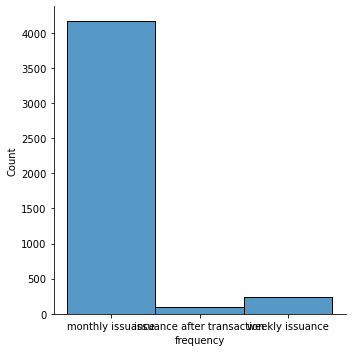

In [10]:
# histogram
sns.displot(df_account['frequency'])

In [11]:
# missing data
total = df_account.isnull().sum().sort_values(ascending=False)
percent = (df_account.isnull().sum()/df_account.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
date,0,0.0
frequency,0,0.0
district_id,0,0.0
account_id,0,0.0


#### Card

In [12]:
# descriptive statistics summary
df_card_dev['disp_id'].describe()

count      177.000000
mean      3031.723164
std       2632.338944
min         41.000000
25%       1080.000000
50%       2513.000000
75%       4270.000000
max      13660.000000
Name: disp_id, dtype: float64

In [13]:
# descriptive statistics summary
df_card_dev['type'].describe()

count         177
unique          3
top       classic
freq          127
Name: type, dtype: object

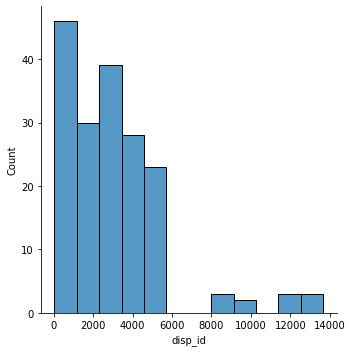

In [14]:
# histogram
sns.displot(df_card_dev['disp_id'])

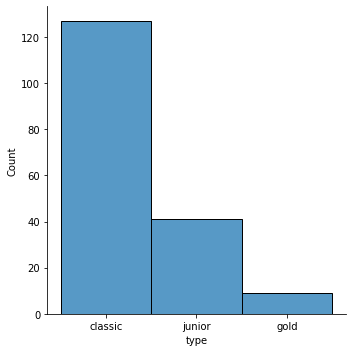

In [15]:
# histogram
sns.displot(df_card_dev['type'])

In [16]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_card_dev['disp_id'].skew())
print("Kurtosis: %f" % df_card_dev['disp_id'].kurt())

Skewness: 1.893233
Kurtosis: 4.645761


In [17]:
# missing data
total = df_card_dev.isnull().sum().sort_values(ascending=False)
percent = (df_card_dev.isnull().sum()/df_card_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
issued,0,0.0
type,0,0.0
disp_id,0,0.0
card_id,0,0.0


#### Client

In [18]:
# descriptive statistics summary
df_client['district_id'].describe()

count    5369.000000
mean       37.310114
std        25.043690
min         1.000000
25%        14.000000
50%        38.000000
75%        60.000000
max        77.000000
Name: district_id, dtype: float64

In [19]:
df_client['sex'].describe()

count     5369
unique       2
top          M
freq      2724
Name: sex, dtype: object

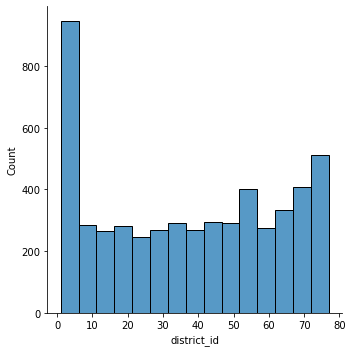

In [20]:
# histogram
sns.displot(df_client['district_id'])

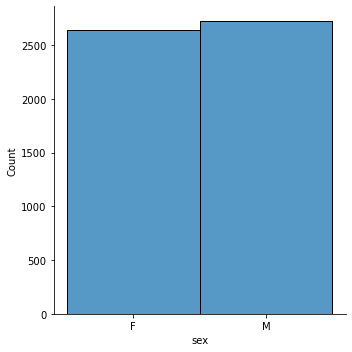

In [21]:
# histogram
sns.displot(df_client['sex'])

In [22]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_client['district_id'].skew())
print("Kurtosis: %f" % df_client['district_id'].kurt())

Skewness: -0.045525
Kurtosis: -1.363442


In [23]:
# missing data
total = df_client.isnull().sum().sort_values(ascending=False)
percent = (df_client.isnull().sum()/df_client.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sex,0,0.0
birthdate,0,0.0
district_id,0,0.0
client_id,0,0.0


#### Disp

In [24]:
# descriptive statistics summary
df_disp['type'].describe()

count      5369
unique        2
top       OWNER
freq       4500
Name: type, dtype: object

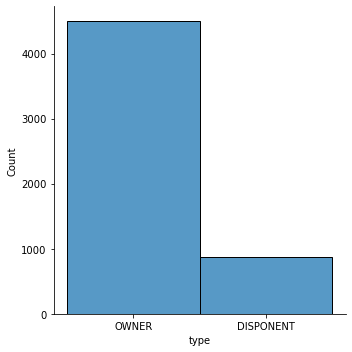

In [25]:
# histogram
sns.displot(df_disp['type'])

In [26]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_disp['disp_id'].skew())
print("Kurtosis: %f" % df_disp['disp_id'].kurt())

Skewness: 1.663303
Kurtosis: 2.929650


In [27]:
# missing data
total = df_disp.isnull().sum().sort_values(ascending=False)
percent = (df_disp.isnull().sum()/df_disp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
type,0,0.0
account_id,0,0.0
client_id,0,0.0
disp_id,0,0.0


#### Loan

In [28]:
# descriptive statistics summary
df_loan_dev['date'].describe()

count            328
unique           283
top       1994-12-21
freq               3
Name: date, dtype: object

In [29]:
df_loan_dev['amount'].describe()

count       328.000000
mean     145308.621951
std      105247.318098
min        4980.000000
25%       68328.000000
50%      114804.000000
75%      198600.000000
max      538500.000000
Name: amount, dtype: float64

In [30]:
df_loan_dev['duration'].describe()

count    328.000000
mean      35.853659
std       16.734752
min       12.000000
25%       24.000000
50%       36.000000
75%       48.000000
max       60.000000
Name: duration, dtype: float64

In [31]:
df_loan_dev['payments'].describe()

count     328.000000
mean     4150.932927
std      2193.620989
min       319.000000
25%      2368.750000
50%      3878.500000
75%      5907.750000
max      9689.000000
Name: payments, dtype: float64

In [32]:
df_loan_dev['status'].describe()

count    328.000000
mean       0.719512
std        0.695541
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

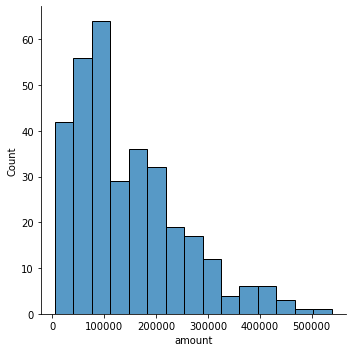

In [33]:
# histogram
sns.displot(df_loan_dev['amount'])

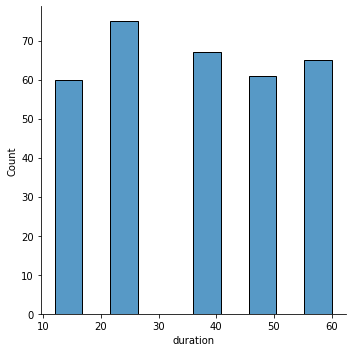

In [34]:
# histogram
sns.displot(df_loan_dev['duration'])

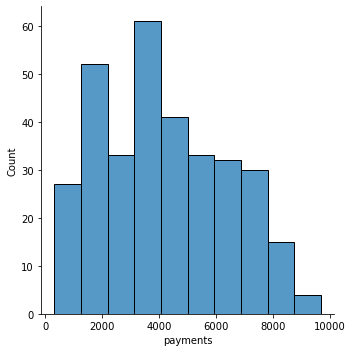

In [35]:
# histogram
sns.displot(df_loan_dev['payments'])

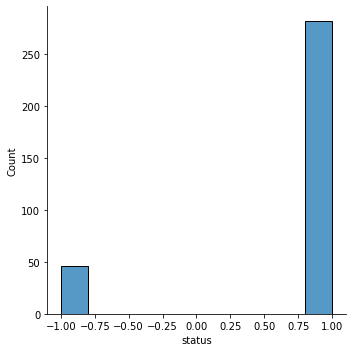

In [36]:
# histogram
sns.displot(df_loan_dev['status'])

In [37]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['amount'].skew())
print("Kurtosis: %f" % df_loan_dev['amount'].kurt())

Skewness: 1.081108
Kurtosis: 0.830694


In [38]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['duration'].skew())
print("Kurtosis: %f" % df_loan_dev['duration'].kurt())

Skewness: 0.055892
Kurtosis: -1.267191


In [39]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['payments'].skew())
print("Kurtosis: %f" % df_loan_dev['payments'].kurt())

Skewness: 0.269339
Kurtosis: -0.846561


In [40]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['status'].skew())
print("Kurtosis: %f" % df_loan_dev['status'].kurt())

Skewness: -2.081621
Kurtosis: 2.347424


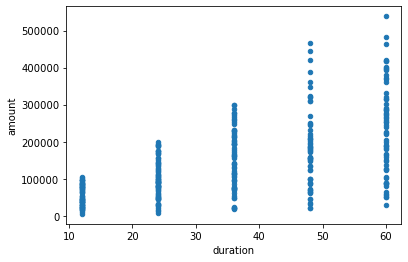

In [41]:
#scatter plot duration/amount
var = 'duration'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

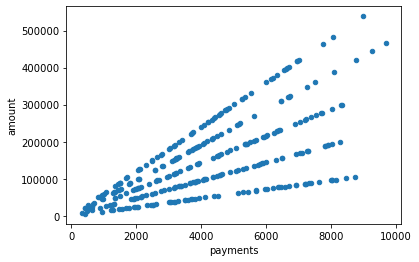

In [42]:
#scatter plot payments/amount
var = 'payments'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

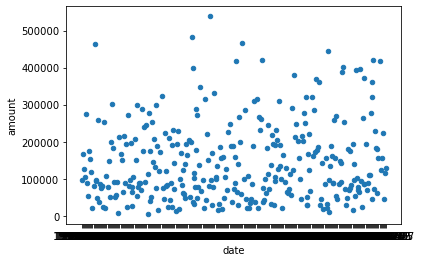

In [43]:
#scatter plot date/amount
var = 'date'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

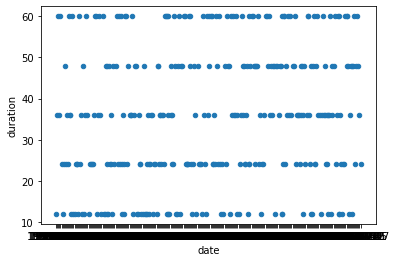

In [44]:
#scatter plot date/duration
var = 'date'
data = pd.concat([df_loan_dev['duration'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='duration');

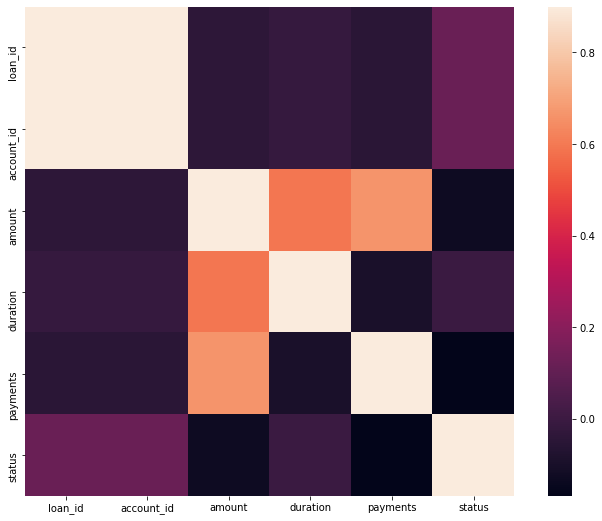

In [45]:
#correlation matrix
corrmat = df_loan_dev.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

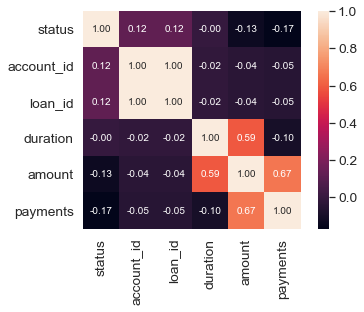

In [46]:
# status correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'status')['status'].index
cm = np.corrcoef(df_loan_dev[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [47]:
# missing data
total = df_loan_dev.isnull().sum().sort_values(ascending=False)
percent = (df_loan_dev.isnull().sum()/df_loan_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
status,0,0.0
payments,0,0.0
duration,0,0.0
amount,0,0.0
date,0,0.0
account_id,0,0.0
loan_id,0,0.0


#### Transaction

In [54]:
# descriptive statistics
# trans_id;account_id;date;type;operation;amount;balance;k_symbol;bank;account
df_trans_dev['trans_id'].count()

396685

In [59]:
# descriptive statistics summary
df_trans_dev['type'].describe()

count         396685
unique             3
top       withdrawal
freq          232093
Name: type, dtype: object

In [60]:
# descriptive statistics summary
df_trans_dev['operation'].describe()

count                 325924
unique                     5
top       withdrawal in cash
freq                  165270
Name: operation, dtype: object

In [61]:
# descriptive statistics summary
df_trans_dev['amount'].describe()

count    396685.000000
mean       5677.552980
std        9190.364137
min           0.000000
25%         127.500000
50%        1952.000000
75%        6500.000000
max       86400.000000
Name: amount, dtype: float64

In [62]:
# descriptive statistics summary
df_trans_dev['k_symbol'].describe()

count                211441
unique                    7
top       interest credited
freq                  70761
Name: k_symbol, dtype: object

In [64]:
# descriptive statistics summary
df_trans_dev['bank'].describe()

count     97242
unique       13
top          ST
freq       8114
Name: bank, dtype: object

<AxesSubplot:>

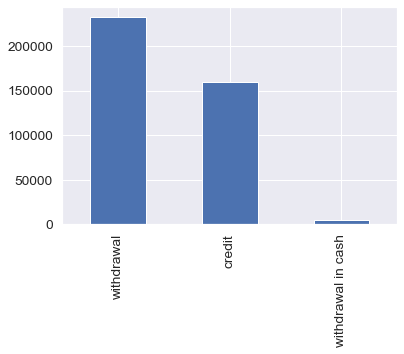

In [86]:
# histogram
df_trans_dev['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

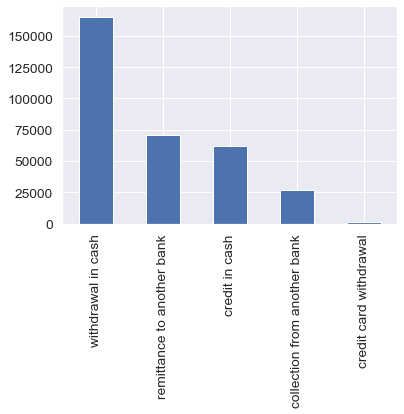

In [85]:
# histogram
df_trans_dev['operation'].value_counts().plot(kind='bar')

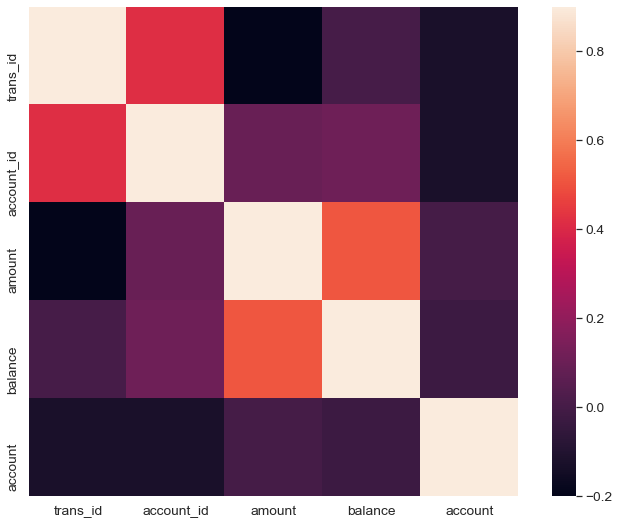

In [75]:
#correlation matrix
corrmat = df_trans_dev.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

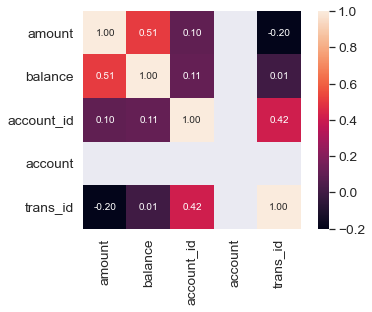

In [84]:
# amount correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'amount')['amount'].index
cm = np.corrcoef(df_trans_dev[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [49]:
# missing data
total = df_trans_dev.isnull().sum().sort_values(ascending=False)
percent = (df_trans_dev.isnull().sum()/df_trans_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bank,299443,0.754863
account,294456,0.742292
k_symbol,185244,0.466980
operation,70761,0.178381
balance,0,0.000000
amount,0,0.000000
type,0,0.000000
date,0,0.000000
account_id,0,0.000000
trans_id,0,0.000000
